## Estadistica Aplicada

Actividad Exentar PIA

Nombre: Alexandra Guadalupe Valdez Mireles    

Matrícula: 1910361

Gpo: 44

In [1]:
## Librerías Básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
## Importar funciones de statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict 
from statsmodels.tsa.arima.model import ARIMA 

## Importar pmdarima para identificar orden del proceso
import pmdarima as pm 

In [63]:
## Importar los datos
imc = pd.read_excel('indicadores2001.xlsx')

In [64]:
imc.head()

,Periodos,IMCMI_SA
0,2001/01,73.350780
1,2001/02,73.086468
2,2001/03,73.247829
3,2001/04,72.990362
4,2001/05,73.128699


In [65]:
## Verificar tipo de variables
imc.dtypes

Periodos     object
IMCMI_SA    float64
dtype: object

In [67]:
## Verificar existencia de missing values
imc.isnull().sum()

Periodos    0
IMCMI_SA    0
dtype: int64

In [68]:
## Formato fecha 
imc['Periodos'] = pd.to_datetime(imc['Periodos'], format='%Y/%m')
## Index
imc = imc.set_index('Periodos')
## Frecuencia 
imc = imc.asfreq('MS')

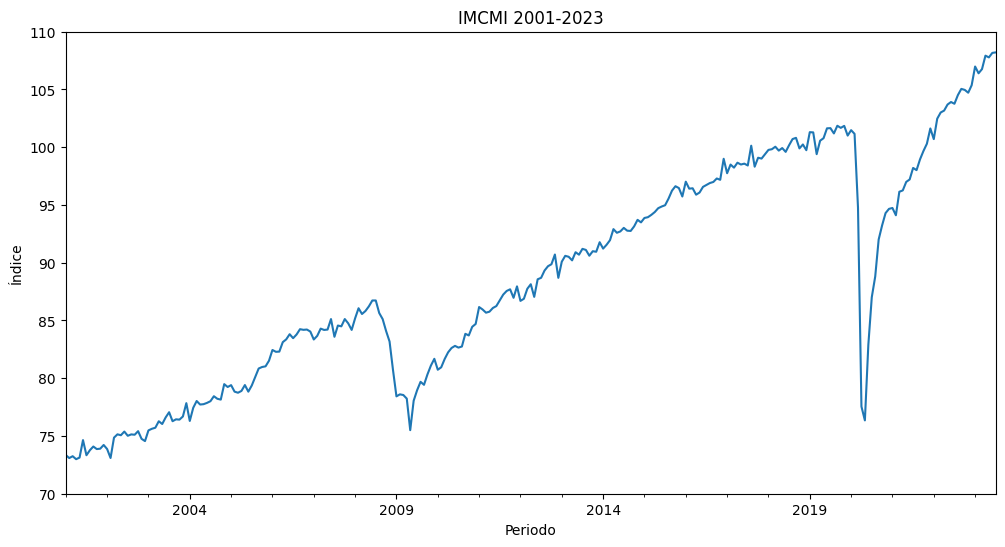

In [95]:
## Gráfico de la serie de tiempo
imc['IMCMI_SA'].plot(figsize=(12,6))
plt.title('IMCMI 2001-2023')
plt.xlabel('Periodo')
plt.ylabel('Índice')
plt.ylim(70,110)
plt.show()

In [71]:
## Prueba de raíz unitaria a la serie original
prueba_adf = adfuller(imc['IMCMI_SA'])
pvalue = prueba_adf[1]
pvalue.round(2)

0.74

No rechazamos Ho, significa que el IMC es una serie no estacionaria.

In [72]:
## Aplicamos primeras diferencias 
imc['IMCMI_SA_diff'] = imc['IMCMI_SA'].diff()

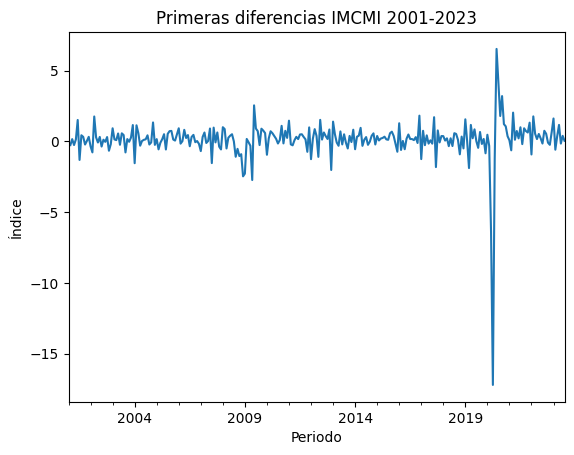

In [96]:
## Graficar primeras diferencias
imc['IMCMI_SA_diff'].plot()
plt.title('Primeras diferencias IMCMI 2001-2023')
plt.xlabel('Periodo')
plt.ylabel('Índice')
plt.show()

In [74]:
## Prueba de raíz unitaria para verificar que sea estacionaria
prueba_adf1 = adfuller(imc['IMCMI_SA_diff'].dropna())
pvalue1 = prueba_adf1[1]
pvalue1.round(2)

0.0

Rechazamos Ho, significa que las primeras diferencias del IMC es un proceso estacionario.

* IMCMI integrado de orden I(1)
* 1ras diferencias del IMCMI integrado I(0)

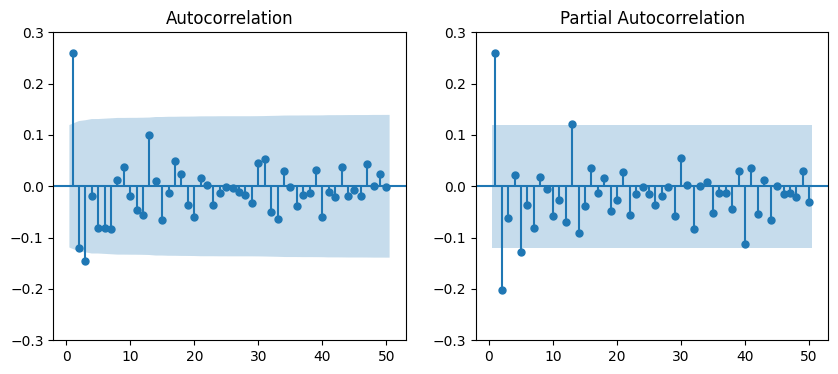

In [75]:
## Gráficas de autocorrelación
ig, ax = plt.subplots(1,2, figsize=(10,4))
## 1er subgráfica
plot_acf(imc['IMCMI_SA_diff'].dropna(), zero=False, lags=50, ax=ax[0])
ax[0].set_ylim(-0.30,0.30)
## 2da subgráfica
plot_pacf(imc['IMCMI_SA_diff'].dropna(), zero=False, lags=50, ax=ax[1])
ax[1].set_ylim(-0.30,0.30)
plt.show()

Las gráficas de autocorrelación muestran que en el primer periodo el IMCMI sube más en comparación a los demás periodos que se mantienen oscilando sin sobresalir. 

In [125]:
## Encontrar el orden del ARIMA
pm.auto_arima(imc['IMCMI_SA'],
              start_p=1,start_q=1,
              max_p=5,max_q=5,
              ic='aic',
              seasonal=True,
              m=12,
              start_P=1,start_Q=1,
              max_P=5,max_Q=5)

ARIMA(order=(0, 1, 3), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [126]:
## Encontrar el orden del ARIMA
pm.auto_arima(imc['IMCMI_SA'],
              start_p=1,start_q=1,
              max_p=5,max_q=5,
              ic='bic',
              seasonal=True,
              m=12,
              start_P=1,start_Q=1,
              max_P=5,max_Q=5)

ARIMA(order=(0, 1, 3), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [127]:
## Encontrar el orden del ARIMA
pm.auto_arima(imc['IMCMI_SA'],
              start_p=1,start_q=1,
              max_p=5,max_q=5,
              ic='hiqc',
              seasonal=True,
              m=12,
              start_P=1,start_Q=1,
              max_P=5,max_Q=5)

ARIMA(order=(0, 1, 3), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [128]:
## Encontrar el orden del ARIMA
pm.auto_arima(imc['IMCMI_SA'],
              start_p=1,start_q=1,
              max_p=10,max_q=10,
              ic='oob',
              seasonal=True,
              m=12,
              start_P=1,start_Q=1,
              max_P=10,max_Q=10)

ARIMA(order=(0, 1, 3), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

El IMCMI SARIMA(0,1,3)(0,0,1,12) 

In [129]:
## Método del if con AR y MA
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(imc['IMCMI_SA_diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar,ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])   

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 1, MA: 4
AR: 1, MA: 5
AR: 1, MA: 6


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 3


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 4


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 5


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 6


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 3


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 4


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 5


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 6


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 3


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 4


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 5


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 6


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 3


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 4


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 5


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 6


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 2


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 3


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 4


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 5


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 6


c:\Users\Karen\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [130]:
ic.sort_values('AIC').head(1)

,,AIC,BIC
AR,MA,,
3,4,926.841798,959.227595


Las primeras diferencias deL IMCMI son un ARMA(3,4) = ARIMA(3,0,4)

In [131]:
## Estimar el modelo Orden ARIMA (0,1,3)(0,0,1,12) 
model = ARIMA(imc['IMCMI_SA'],
              order=(0,1,3),
              seasonal_order=(0,1,1,12))
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           IMCMI_SA   No. Observations:                  271
Model:             ARIMA(0, 1, 3)x(0, 1, [1], 12)   Log Likelihood                -461.570
Date:                            Thu, 02 Nov 2023   AIC                            933.140
Time:                                    22:06:55   BIC                            950.905
Sample:                                01-01-2001   HQIC                           940.283
                                     - 07-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2993      0.041      7.214      0.000       0.218       0.381
ma.L2         -0.1094      0.051   

In [132]:
##
imc['IMCMI_SA_arima'] = results.predict()

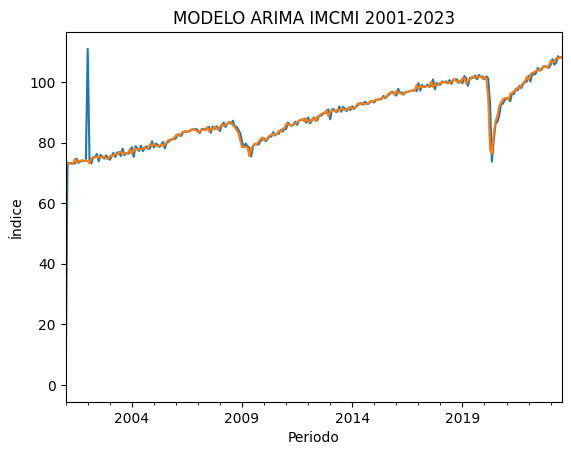

In [133]:
imc['IMCMI_SA_arima'].plot()
imc['IMCMI_SA'].plot()
plt.title('MODELO ARIMA IMCMI 2001-2023')
plt.xlabel('Periodo')
plt.ylabel('Índice')
plt.show()

In [134]:
imc.tail()

,IMCMI_SA,IMCMI_SA_diff,IMCMI_SA_arima
Periodos,,,
2023-03-01,106.762443,0.361856,105.736572
2023-04-01,107.928291,1.165848,106.335697
2023-05-01,107.775653,-0.152638,108.463194
2023-06-01,108.168118,0.392465,107.943703
2023-07-01,108.209387,0.041269,108.256824


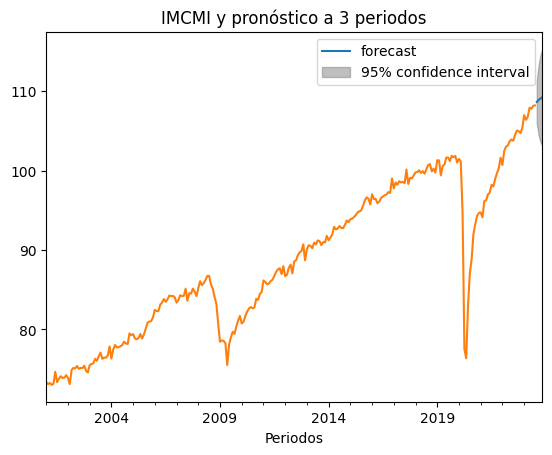

In [135]:
## Termina en julio, pronostica en agosto
plot_predict(results, '2023-08-01', '2023-11-01')
imc['IMCMI_SA'].plot()
plt.title('IMCMI y pronóstico a 3 periodos')
plt.show()

In [136]:
forecast = results.get_forecast(steps=6)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [137]:
inicio = '2023-08-01'
fin = '2023-11-01'

In [138]:
pronostico_valor = forecast_mean[inicio:fin]
pronostico_intervalos = forecast_ci.loc[inicio:fin]

In [139]:
pronostico_valor

2023-08-01    108.647880
2023-09-01    108.894594
2023-10-01    109.073404
2023-11-01    109.239169
Freq: MS, Name: predicted_mean, dtype: float64

In [140]:
pronostico_intervalos

,lower IMCMI_SA,upper IMCMI_SA
2023-08-01,105.950219,111.345541
2023-09-01,104.471705,113.317484
2023-10-01,103.608572,114.538236
2023-11-01,103.144178,115.334159


In [141]:
## 
df_forecast = pd.DataFrame({
'Pronóstico':pronostico_valor,
'Límite inferior':pronostico_intervalos.iloc[:,0],
'Limite superior':pronostico_intervalos.iloc[:,1]
})

In [142]:
df_forecast

,Pronóstico,Límite inferior,Limite superior
2023-08-01,108.647880,105.950219,111.345541
2023-09-01,108.894594,104.471705,113.317484
2023-10-01,109.073404,103.608572,114.538236
2023-11-01,109.239169,103.144178,115.334159


In [143]:
print(f'El IMCMI_SA pronosticado para agosto de 2023 es {df_forecast.iloc[0,0].round(1)}%\nCon un 95% de confianza el IMCMI_SA está entre {df_forecast.iloc[0,1].round(1)}% y {df_forecast.iloc[0,2].round(1)}%')

El IMCMI_SA pronosticado para agosto de 2023 es 108.6%
Con un 95% de confianza el IMCMI_SA está entre 106.0% y 111.3%
